In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

## Set time from a certain number of years

In [2]:
years = 15

endDate = dt.datetime.now()

startDate = endDate - dt.timedelta(days=years*365)

## Create a list of tickers

In [3]:
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

## Download daily Adjusted Close prices for the tickers

In [4]:
adjClose = pd.DataFrame()

for ticker in tickers:
    adjClose[ticker] = yf.download(ticker, startDate, endDate)['Adj Close']

print(adjClose)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2009-05-21   67.304924  50.316223   93.849998   29.413809   33.839222
2009-05-22   67.161598  50.303188   94.150002   29.317659   33.861988
2009-05-26   68.881752  50.199158   93.760002   30.410303   34.772457
2009-05-27   67.651978  49.899990   93.449997   30.200508   34.188232
2009-05-28   68.595039  50.030090   94.239998   30.550152   34.613117
...                ...        ...         ...         ...         ...
2024-05-10  520.840027  71.379997  218.710007  442.059998  258.049988
2024-05-13  520.909973  71.440002  216.259995  443.079987  258.190002
2024-05-14  523.299988  71.650002  218.089996  445.929993  259.450012
2024-05-15  529.780029  72.110001  220.889999  452.899994  262.640015
2024-05-16  528.690002  71.989998  220.029999  451.980011  261.929993

[3773 rows x 5 columns]


## Calculate the daily log returns & drop NAs

In [5]:
logReturns = np.log(adjClose / adjClose.shift(1))

logReturns = logReturns.dropna()

print(logReturns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2009-05-22 -0.002132 -0.000259  0.003192 -0.003274  0.000673
2009-05-26  0.025290 -0.002070 -0.004151  0.036591  0.026533
2009-05-27 -0.018015 -0.005977 -0.003312 -0.006923 -0.016944
2009-05-28  0.013844  0.002604  0.008418  0.011511  0.012351
2009-05-29  0.017553  0.007123  0.020585  0.012229  0.015444
...              ...       ...       ...       ...       ...
2024-05-10  0.001287 -0.002798  0.008080  0.002355  0.000930
2024-05-13  0.000134  0.000840 -0.011265  0.002305  0.000542
2024-05-14  0.004578  0.002935  0.008426  0.006412  0.004868
2024-05-15  0.012307  0.006400  0.012757  0.015509  0.012220
2024-05-16 -0.002060 -0.001666 -0.003901 -0.002033 -0.002707

[3772 rows x 5 columns]


## Create an equal weight portfolio

In [6]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


## Calculating Historical Portfolio Returns

In [7]:
historical_returns = (logReturns * weights).sum(axis =1)
print(historical_returns)

Date
2009-05-22   -0.000360
2009-05-26    0.016438
2009-05-27   -0.010234
2009-05-28    0.009746
2009-05-29    0.014587
                ...   
2024-05-10    0.001971
2024-05-13   -0.001489
2024-05-14    0.005444
2024-05-15    0.011839
2024-05-16   -0.002473
Length: 3772, dtype: float64


## Finding X-Day Historical Returns

In [8]:
days = 50

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2009-08-03    0.089973
2009-08-04    0.093138
2009-08-05    0.073844
2009-08-06    0.079634
2009-08-07    0.074616
                ...   
2024-05-10    0.040516
2024-05-13    0.027757
2024-05-14    0.031588
2024-05-15    0.048912
2024-05-16    0.041001
Length: 3723, dtype: float64


## Calculating VaR Using the Historical Method

In [9]:
confidence_interval = 0.99

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

109874.33556273163


## Plotting the Results of the Historical Returns

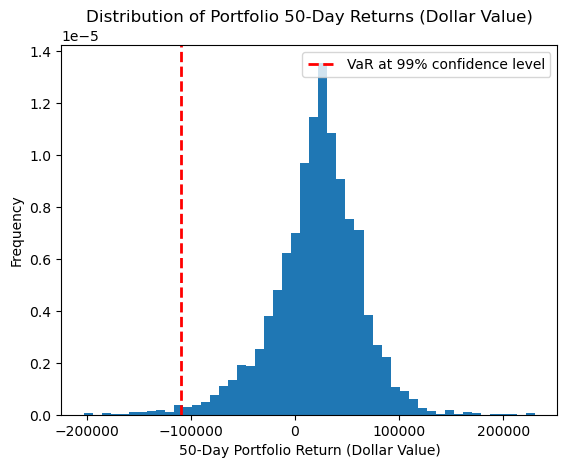

In [10]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()